In [2]:
from kervis.utils import Model
from kervis.utils import Dataset
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, Graphlet, WeisfeilerLehman

In [3]:
VH = VertexHistogram()
EH = EdgeHistogram()
SP = ShortestPath()
GL = Graphlet()
WL = WeisfeilerLehman()

In [5]:
VH_MUTAG = Model(VH, Dataset('MUTAG'), "kmeans")
EH_MUTAG = Model(EH, Dataset('MUTAG'), "kmeans")
GL_MUTAG = Model(GL, Dataset('MUTAG'), "kmeans")
SP_MUTAG = Model(SP, Dataset('MUTAG'), "kmeans")
WL_MUTAG = Model(WL, Dataset('MUTAG'), "kmeans")

VH_MUTAG.evaluate()
EH_MUTAG.evaluate()
GL_MUTAG.evaluate()
SP_MUTAG.evaluate()
WL_MUTAG.evaluate()

              precision    recall  f1-score   support

           0       0.06      0.08      0.07        12
           1       0.50      0.42      0.46        26

    accuracy                           0.32        38
   macro avg       0.28      0.25      0.26        38
weighted avg       0.36      0.32      0.34        38

              precision    recall  f1-score   support

           0       0.12      0.25      0.17        12
           1       0.36      0.19      0.25        26

    accuracy                           0.21        38
   macro avg       0.24      0.22      0.21        38
weighted avg       0.28      0.21      0.22        38

              precision    recall  f1-score   support

           0       0.12      0.17      0.14        12
           1       0.55      0.46      0.50        26

    accuracy                           0.37        38
   macro avg       0.34      0.31      0.32        38
weighted avg       0.41      0.37      0.39        38

              preci

In [6]:
VH_AIDS = Model(VH, Dataset('AIDS'), "svm")
EH_AIDS = Model(EH, Dataset('AIDS'), "svm")
GL_AIDS = Model(GL, Dataset('AIDS'), "svm")
SP_AIDS = Model(SP, Dataset('AIDS'), "svm")
WL_AIDS = Model(WL, Dataset('AIDS'), "svm")

VH_AIDS.evaluate()
EH_AIDS.evaluate()
GL_AIDS.evaluate()
SP_AIDS.evaluate()
WL_AIDS.evaluate()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00       319

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       1.00      1.00      1.00       319

    accuracy                           1.00       400
   macro avg       0.99      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        81
           1       1.00      0.98      0.99       319

    accuracy                           0.98       400
   macro avg       0.96      0.99      0.97       400
weighted avg       0.98      0.98      0.98       400

              preci

In [66]:
# use logistic regression to classify the graphlets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dataset = Dataset("MUTAG")
VH = WeisfeilerLehman(n_iter=2)
VH.fit_transform(dataset.data)
X = VH.X
y = dataset.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8421052631578947


In [67]:
# use SHAP to explain the MLP
import shap

explainer = shap.Explainer(clf.predict, X_train, algorithm="permutation", seed=0, max_evals=2*X_train.shape[1]+1)
shap_values = explainer(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


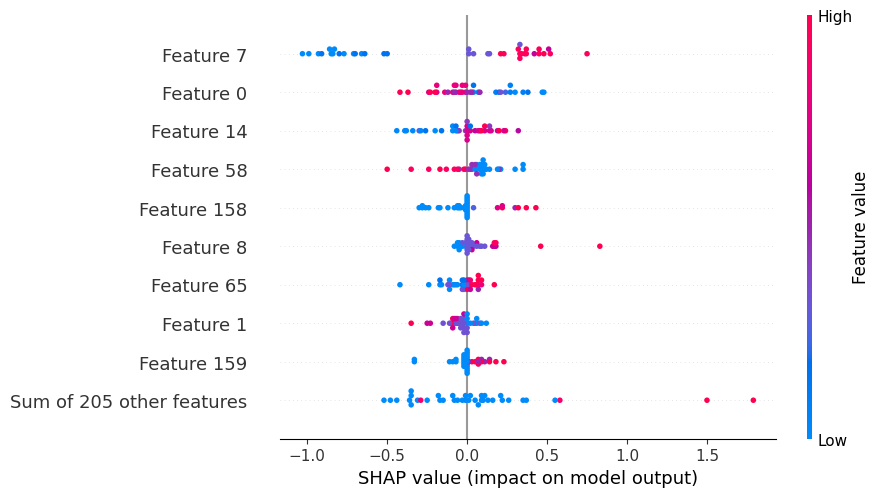

In [69]:
shap.plots.beeswarm(shap_values, max_display=10)